# Test Scan merging

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

from planeslam.geometry.util import quat_to_rot_mat
from planeslam.general import plot_3D_setup
import planeslam.io as io
from planeslam.extraction import pc_to_planes
from planeslam.scan import pc_to_scan

%load_ext autoreload
%autoreload 2

Read in airsim LiDAR and pose data

In [2]:
# Read in point cloud data
binpath = os.path.join(os.getcwd(),'..', 'data', 'airsim', 'blocks_20_samples_1', 'lidar', 'Drone0')
PC_data = io.read_lidar_bin(binpath)

In [3]:
# Read in ground-truth poses (in drone local frame)
posepath = os.path.join(os.getcwd(),'..', 'data', 'airsim', 'blocks_20_samples_1', 'poses', 'Drone0')
drone_positions, drone_orientations = io.read_poses(posepath)

Extract scans from LiDAR point clouds

In [4]:
# Extract scans and planesets
num_scans = len(PC_data)
scans = num_scans * [None]
planesets = num_scans * [None]

for i in range(num_scans):
    scans[i] = pc_to_scan(PC_data[i])
    scans[i].transform(quat_to_rot_mat(drone_orientations[i,:]), drone_positions[i,:])

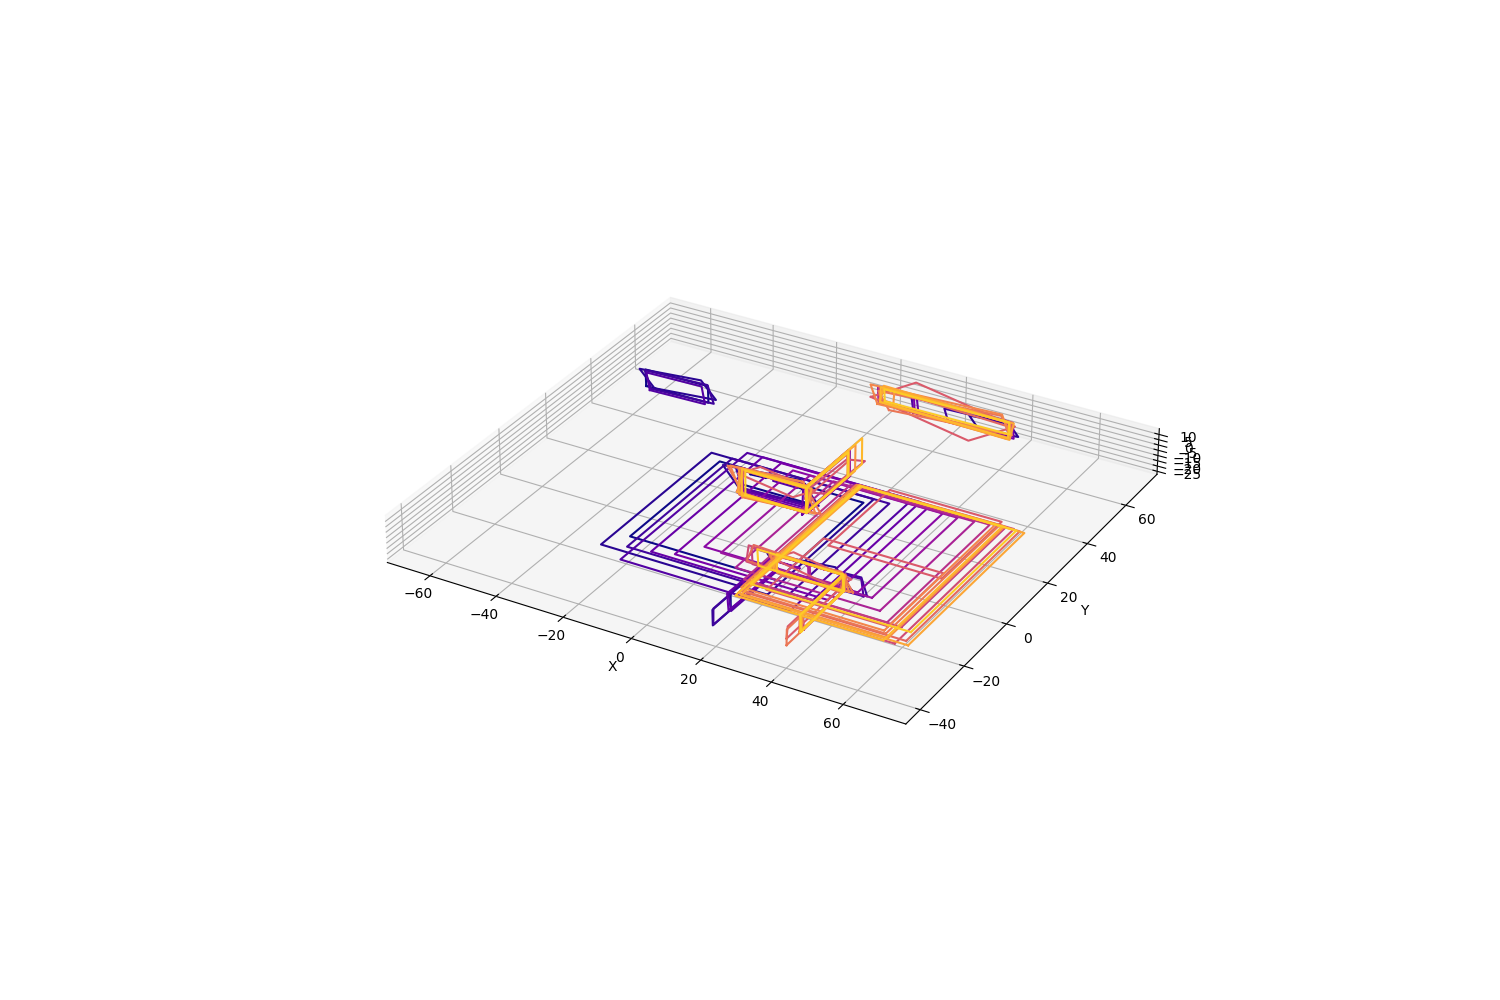

In [5]:
# Plot scans
ax = plot_3D_setup(PC_data[0])

cmap = cm.get_cmap('plasma')
cmap_idxs = int(len(cmap.colors) / num_scans) * np.arange(num_scans)
colors = np.asarray(cmap.colors)[cmap_idxs,:]

for i, scan in enumerate(scans):
    scan.plot(ax, color=colors[i])

Merge Scans

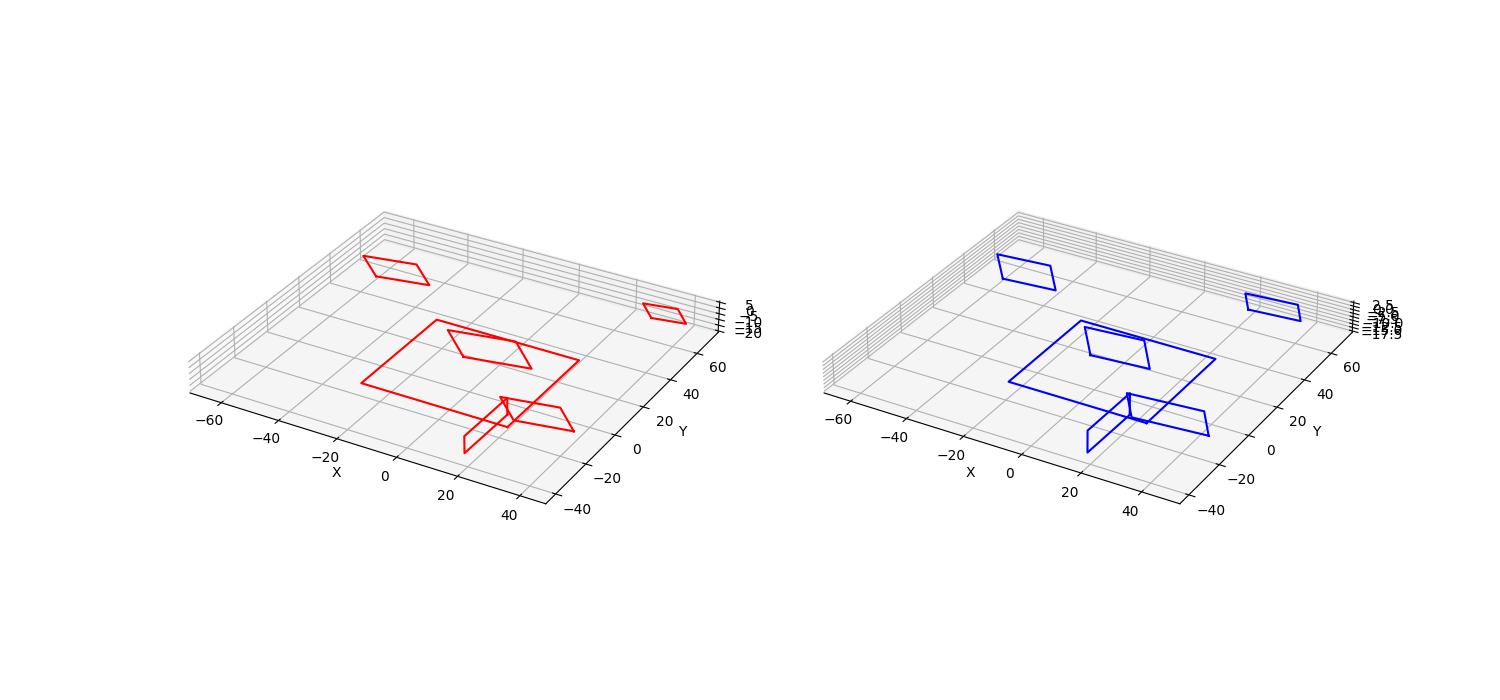

In [6]:
idx_1 = 1
idx_2 = 2

# Plot 2 scans
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.set_box_aspect((np.ptp(PC_data[0][:,0]), np.ptp(PC_data[0][:,1]), np.ptp(PC_data[0][:,2])))
ax2.set_box_aspect((np.ptp(PC_data[0][:,0]), np.ptp(PC_data[0][:,1]), np.ptp(PC_data[0][:,2])))
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

scans[idx_1].plot(ax1, color='r', show_normals=False)
scans[idx_2].plot(ax2, color='b', show_normals=False)

In [ ]:
merge = scans[idx_1].merge(scans[idx_2])

In [ ]:
# Plot merge
ax = plot_3D_setup(PC_data[0])

scans[idx_1].plot(ax, color='r', show_normals=False)
scans[idx_2].plot(ax, color='b', show_normals=False)

merge.plot(ax, color='m', show_normals=False)

In [ ]:
merged = scans[0]

for s in scans[1:]:
    merged = merged.merge(s)

In [ ]:
# Plot merge
ax = plot_3D_setup(PC_data[0])
merged.plot(ax)